In [27]:
import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Load the Dataset cifar10

In [2]:
from keras.datasets import cifar10

In [9]:
(X_train, y_train) , (X_test, y_test) =  cifar10.load_data()

In [11]:
print(" X_train shape = ",X_train.shape)
print(" y_train shape = ",y_train.shape)
print(" X_test shape  = ",X_test.shape)
print(" y_test shape  = ",y_test.shape)

 X_train shape =  (50000, 32, 32, 3)
 y_train shape =  (50000, 1)
 X_test shape  =  (10000, 32, 32, 3)
 y_test shape  =  (10000, 1)


#### ***Display Single image***

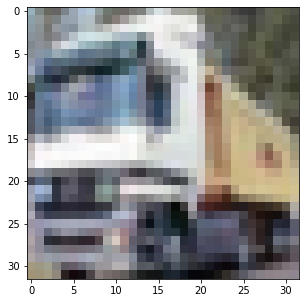

In [54]:
fig = plt.figure(figsize=(20,5))
plt.imshow(X_train[1]);      

#### ***Display set of images***

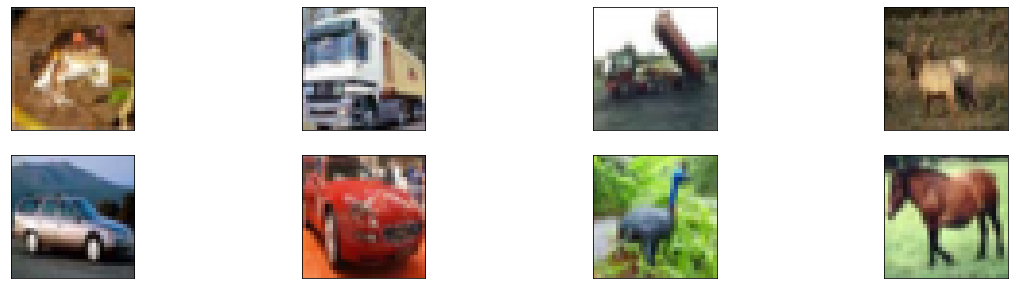

In [83]:
fig1 = plt.figure(figsize=(20,5))
for i in range(8):
    ax1 = fig1.add_subplot(2, 4, i+1,xticks=[],yticks=[])
    ax1.imshow(np.squeeze(X_train[i]))

#### ***Normalize the Images***

In [85]:
X_train = X_train.astype('float32')/255
X_test  = X_test.astype('float32')/255

#### ***Perform one hand encoding***

In [94]:
num_classes = len(np.unique(y_train))

In [96]:
y_train = keras.utils.to_categorical(y_train,num_classes)

In [99]:
y_test = keras.utils.to_categorical(y_test,num_classes)

#### ***Split Data into training, testing, and validation***

In [108]:
X_train, x_valid = X_train[5000:], X_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

#### ***Print number of training, validation and test images***

In [110]:
print("training images",X_train.shape)
print("Validation images",x_valid.shape)
print("testing images",y_test.shape)
print("Test Validation images",y_valid.shape)

training images (45000, 32, 32, 3)
Validation images (5000, 32, 32, 3)
testing images (10000, 10)
Test Validation images (5000, 10)


#### ***Define the model architecture***

In [168]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPool2D,Dropout,Dense

In [169]:
model = Sequential()

In [170]:
model.add(Conv2D(16,kernel_size=2, strides = 1, padding = "same", 
                                      activation="relu",input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))

In [171]:
model.add(Conv2D(32,kernel_size=2, strides = 1, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))

In [172]:
model.add(Conv2D(64,kernel_size=2, strides = 1, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))

In [173]:
model.add(Dropout(0.3))

In [174]:
model.add(Flatten())

In [175]:
model.add(Dense(500,activation='relu'))

In [176]:
model.add(Dropout(0.4))

In [177]:
model.add(Dense(10,activation="softmax"))

In [178]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)         

#### ***Compile the model***

In [179]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

#### ***Train the model***

In [152]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only = True)
hist = model.fit(X_train, y_train, batch_size = 32, epochs = 100,
                validation_data=(x_valid,y_valid),callbacks=[checkpointer],verbose=2,shuffle=True)

Epoch 1/100
1407/1407 - 39s - loss: 1.5832 - accuracy: 0.4286 - val_loss: 1.4686 - val_accuracy: 0.4876

Epoch 00001: val_loss improved from inf to 1.46863, saving model to model.weights.best.hdf5
Epoch 2/100
1407/1407 - 38s - loss: 1.2626 - accuracy: 0.5507 - val_loss: 1.2483 - val_accuracy: 0.5640

Epoch 00002: val_loss improved from 1.46863 to 1.24827, saving model to model.weights.best.hdf5
Epoch 3/100
1407/1407 - 36s - loss: 1.1485 - accuracy: 0.5942 - val_loss: 1.1963 - val_accuracy: 0.5830

Epoch 00003: val_loss improved from 1.24827 to 1.19631, saving model to model.weights.best.hdf5
Epoch 4/100
1407/1407 - 38s - loss: 1.0778 - accuracy: 0.6221 - val_loss: 1.0324 - val_accuracy: 0.6412

Epoch 00004: val_loss improved from 1.19631 to 1.03238, saving model to model.weights.best.hdf5
Epoch 5/100
1407/1407 - 38s - loss: 1.0365 - accuracy: 0.6352 - val_loss: 1.0170 - val_accuracy: 0.6462

Epoch 00005: val_loss improved from 1.03238 to 1.01702, saving model to model.weights.best.hdf5


Epoch 00051: val_loss did not improve from 0.94652
Epoch 52/100
1407/1407 - 38s - loss: 1.5122 - accuracy: 0.4880 - val_loss: 1.6896 - val_accuracy: 0.4134

Epoch 00052: val_loss did not improve from 0.94652
Epoch 53/100
1407/1407 - 38s - loss: 1.5234 - accuracy: 0.4866 - val_loss: 1.4178 - val_accuracy: 0.5310

Epoch 00053: val_loss did not improve from 0.94652
Epoch 54/100
1407/1407 - 37s - loss: 1.5246 - accuracy: 0.4860 - val_loss: 1.4973 - val_accuracy: 0.4888

Epoch 00054: val_loss did not improve from 0.94652
Epoch 55/100
1407/1407 - 37s - loss: 1.5493 - accuracy: 0.4740 - val_loss: 1.4070 - val_accuracy: 0.5430

Epoch 00055: val_loss did not improve from 0.94652
Epoch 56/100
1407/1407 - 38s - loss: 1.5631 - accuracy: 0.4650 - val_loss: 1.6862 - val_accuracy: 0.4462

Epoch 00056: val_loss did not improve from 0.94652
Epoch 57/100
1407/1407 - 39s - loss: 1.5707 - accuracy: 0.4689 - val_loss: 10.6711 - val_accuracy: 0.2710

Epoch 00057: val_loss did not improve from 0.94652
Epoch

#### ***LOAD THE MODEL WITH THE BEST VAL_ACC***

In [180]:
model.load_weights('model.weights.best.hdf5')

#### ***Evaluate the model***

In [182]:
score = model.evaluate(X_test, y_test,verbose=0)
print(" Tets accuracy ",score[1])

 Tets accuracy  0.6859999895095825
